In [20]:
large_dataset_path ="/mnt/c/Users/User/thesis/data_import/data_large_size/filtered_riksdag.json"
small_dataset_path = "/mnt/c/Users/User/thesis/data_import/data_small_size/data/dataset_small.json"

In [21]:
import json

# Load the large dataset and count the number of entries
with open(large_dataset_path, 'r') as large_file:
    large_dataset = json.load(large_file)
    large_dataset_entries = len(large_dataset)

# Load the small dataset and count the number of entries
with open(small_dataset_path, 'r') as small_file:
    small_dataset = json.load(small_file)
    small_dataset_entries = len(small_dataset)

# Compare and print the number of entries
print(f"Number of entries in large dataset: {large_dataset_entries}")
print(f"Number of entries in small dataset: {small_dataset_entries}")



Number of entries in large dataset: 47271
Number of entries in small dataset: 27427


In [22]:
from collections import Counter

# Extract the list of speakers ("talare") from the small dataset
speakers = [entry['talare'] for entry in small_dataset if 'talare' in entry]

# Count the occurrences of each speaker
speaker_counts = Counter(speakers)

# Find the speakers with the most speeches
most_common_speakers = speaker_counts.most_common()

# Print the results
print(f"Total number of speakers: {len(speaker_counts)}")
print("Top 10 speakers with the most speeches:")
for speaker, count in most_common_speakers:
    print(f"{speaker}: {count} speeches")

Total number of speakers: 439
Top 10 speakers with the most speeches:
Tomas Eneroth: 609 speeches
n Ann Linde: 541 speeches
n Lena Hallengren: 457 speeches
Justitie- och migrationsministern Morgan Johansson: 412 speeches
Anders Ygeman: 395 speeches
Mikael Damberg: 353 speeches
Stefan Löfven: 338 speeches
Thomas Morell: 330 speeches
n Magdalena Andersson: 318 speeches
Ibrahim Baylan: 312 speeches
Jens Holm: 304 speeches
Morgan Johansson: 302 speeches
Håkan Svenneling: 263 speeches
Tobias Andersson: 262 speeches
Maria Gardfjell: 247 speeches
Alexandra Anstrell: 242 speeches
Joar Forssell: 233 speeches
Miljö- och klimatministern Per Bolund: 228 speeches
Märta Stenevi: 224 speeches
Lars Beckman: 223 speeches
Magdalena Andersson: 220 speeches
n Anna Ekström: 213 speeches
Hans Wallmark: 209 speeches
n Eva Nordmark: 199 speeches
Kerstin Lundgren: 197 speeches
Kultur- och demokratiministern Amanda Lind: 187 speeches
n Peter Hultqvist: 183 speeches
Ludvig Aspling: 170 speeches
Jennie Nilsson: 1

In [23]:

# Extract the list of speakers ("talare") from the small dataset
speakers = [entry['talare'] for entry in large_dataset if 'talare' in entry]

# Count the occurrences of each speaker
speaker_counts = Counter(speakers)

# Find the speakers with the most speeches
most_common_speakers = speaker_counts.most_common()

# Print the results
print(f"Total number of speakers: {len(speaker_counts)}")
print("Top 10 speakers with the most speeches:")
for speaker, count in most_common_speakers:
    print(f"{speaker}: {count} speeches")

Total number of speakers: 492
Top 10 speakers with the most speeches:
Tomas Eneroth: 964 speeches
Stefan Löfven: 921 speeches
Justitie- och migrationsministern Morgan Johansson: 826 speeches
n Lena Hallengren: 751 speeches
n Ann Linde: 692 speeches
n Magdalena Andersson: 664 speeches
Mikael Damberg: 646 speeches
Ibrahim Baylan: 533 speeches
Anders Ygeman: 522 speeches
Jens Holm: 514 speeches
Miljö- och klimatministern Isabella Lövin: 440 speeches
Thomas Morell: 434 speeches
Håkan Svenneling: 429 speeches
n Anna Ekström: 424 speeches
Maria Gardfjell: 420 speeches
Lars Beckman: 387 speeches
Tobias Andersson: 346 speeches
Hans Wallmark: 338 speeches
Joar Forssell: 337 speeches
Kultur- och demokratiministern Amanda Lind: 332 speeches
Jennie Nilsson: 331 speeches
Per Bolund: 326 speeches
Alexandra Anstrell: 314 speeches
n Eva Nordmark: 314 speeches
Johan Pehrson: 303 speeches
Morgan Johansson: 302 speeches
Ludvig Aspling: 300 speeches
n Peter Hultqvist: 300 speeches
Kerstin Lundgren: 284 sp

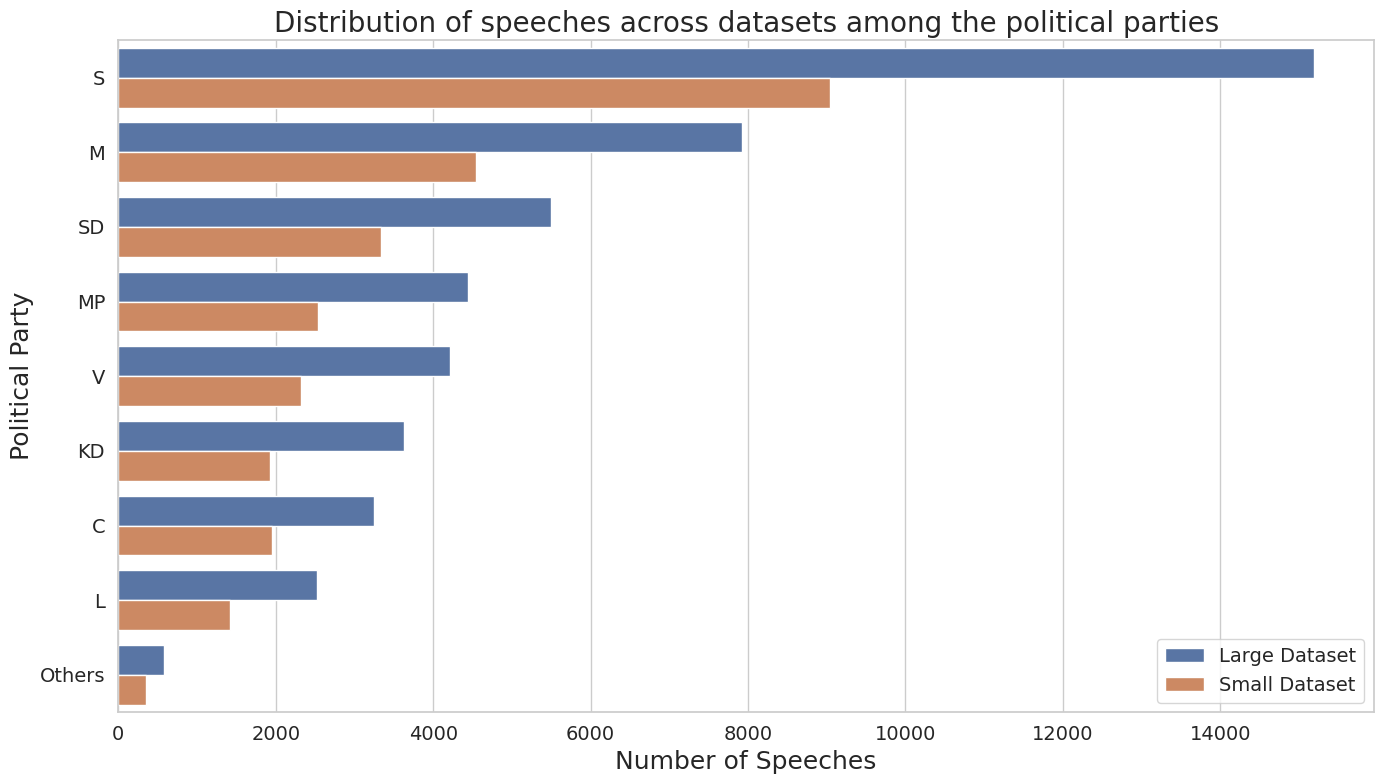

In [67]:
from tkinter import font
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Define the list of valid parties
valid_parties = ["M", "KD", "L", "C", "MP", "V", "S", "SD"]

# Filter out None values and count parties, replacing others with 'Others'
small_parties = [
    entry['parti'] if entry['parti'] in valid_parties else 'Others'
    for entry in small_dataset if 'parti' in entry and entry['parti'] is not None
]
large_parties = [
    entry['parti'] if entry['parti'] in valid_parties else 'Others'
    for entry in large_dataset if 'parti' in entry and entry['parti'] is not None
]

# Count occurrences
small_party_counts = Counter(small_parties)
large_party_counts = Counter(large_parties)

# Union of all valid parties, including 'Others'
all_parties = set(small_party_counts.keys()).union(large_party_counts.keys())

# Prepare the data for plotting (convert to DataFrame for easy manipulation with seaborn)
data = {
    'Party': [],
    'Dataset': [],
    'Speech Count': []
}

for party in all_parties:
    data['Party'].append(party)
    data['Dataset'].append('Small Dataset')
    data['Speech Count'].append(small_party_counts.get(party, 0))
    
    data['Party'].append(party)
    data['Dataset'].append('Large Dataset')
    data['Speech Count'].append(large_party_counts.get(party, 0))

df = pd.DataFrame(data)

# Sort by Speech Count (descending order)
df = df.sort_values(by='Speech Count', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='Speech Count', y='Party', hue='Dataset', data=df, dodge=True)

# Set axis labels and title with fontsize
plt.xlabel('Number of Speeches', fontsize=18)
plt.ylabel('Political Party', fontsize=18)
plt.title('Distribution of speeches across datasets among the political parties', fontsize=20)

# Increase tick label size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Increase legend font size
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()



In [25]:
# Count unique "dok_id" in the small dataset
small_dataset_dok_ids = {entry['dok_id'] for entry in small_dataset if 'dok_id' in entry}
small_dataset_unique_dok_ids = len(small_dataset_dok_ids)

# Count unique "dok_id" in the large dataset
large_dataset_dok_ids = {entry['dok_id'] for entry in large_dataset if 'dok_id' in entry}
large_dataset_unique_dok_ids = len(large_dataset_dok_ids)

# Print the results
print(f"Number of unique 'dok_id' in small dataset: {small_dataset_unique_dok_ids}")
print(f"Number of unique 'dok_id' in large dataset: {large_dataset_unique_dok_ids}")

Number of unique 'dok_id' in small dataset: 282
Number of unique 'dok_id' in large dataset: 519


In [28]:
from collections import defaultdict
# Create a dictionary to collect unique dok_titel entries per dok_id
small_dok_titel_sets = defaultdict(set)
large_dok_titel_sets = defaultdict(set)

# Iterate through the dataset and add each dok_titel to the set for its dok_id
for entry in small_dataset:
    if 'dok_id' in entry and 'avsnittsrubrik' in entry:
        small_dok_titel_sets[entry['dok_id']].add(entry['avsnittsrubrik'])

for entry in large_dataset:
    if 'dok_id' in entry and 'avsnittsrubrik' in entry:
        large_dok_titel_sets[entry['dok_id']].add(entry['avsnittsrubrik'])



# Count unique dok_titel per dok_id
small_dok_titel_counts = {dok_id: len(titels) for dok_id, titels in small_dok_titel_sets.items()}
large_dok_titel_counts = {dok_id: len(titels) for dok_id, titels in large_dok_titel_sets.items()}

# Find the highest value in the dictionaries
max_small_dok_titel_count = max(small_dok_titel_counts.values())
max_large_dok_titel_count = max(large_dok_titel_counts.values())

# Print the results
print(f"Highest value in small_dok_titel_counts: {max_small_dok_titel_count}")
print(f"Highest value in large_dok_titel_counts: {max_large_dok_titel_count}")
#for dok_id, count in dok_titel_counts.items():
#    print(f"{dok_id}: {count} unique dok_titel")


Highest value in small_dok_titel_counts: 22
Highest value in large_dok_titel_counts: 22


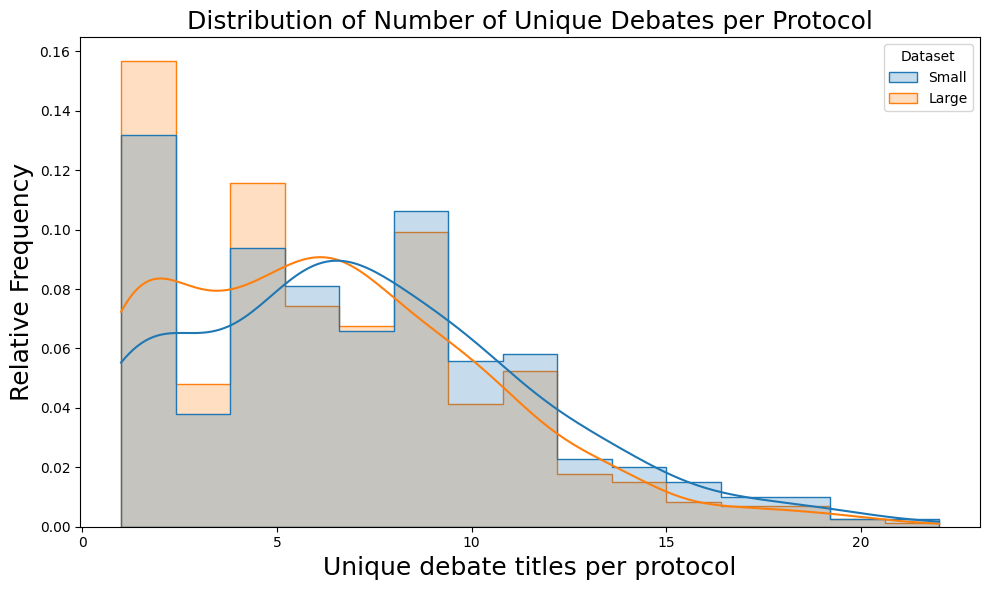

In [40]:
# Get count values
small_counts = list(small_dok_titel_counts.values())
large_counts = list(large_dok_titel_counts.values())

# Create a combined DataFrame for seaborn
combined_df = pd.DataFrame({
    'count': small_counts + large_counts,
    'Dataset': ['Small'] * len(small_counts) + ['Large'] * len(large_counts)
})

plt.figure(figsize=(10, 6))
sns.histplot(
    data=combined_df,
    x='count',
    hue='Dataset',
    bins=15,
    kde=True,
    element='step',
    stat='density',
    common_norm=False
)

plt.title('Distribution of Number of Unique Debates per Protocol', fontsize=18)

# Use a clearer y-axis label
plt.ylabel('Relative Frequency', fontsize=18)

plt.xlabel('Unique debate titles per protocol',fontsize=18)

plt.tight_layout()

plt.show()

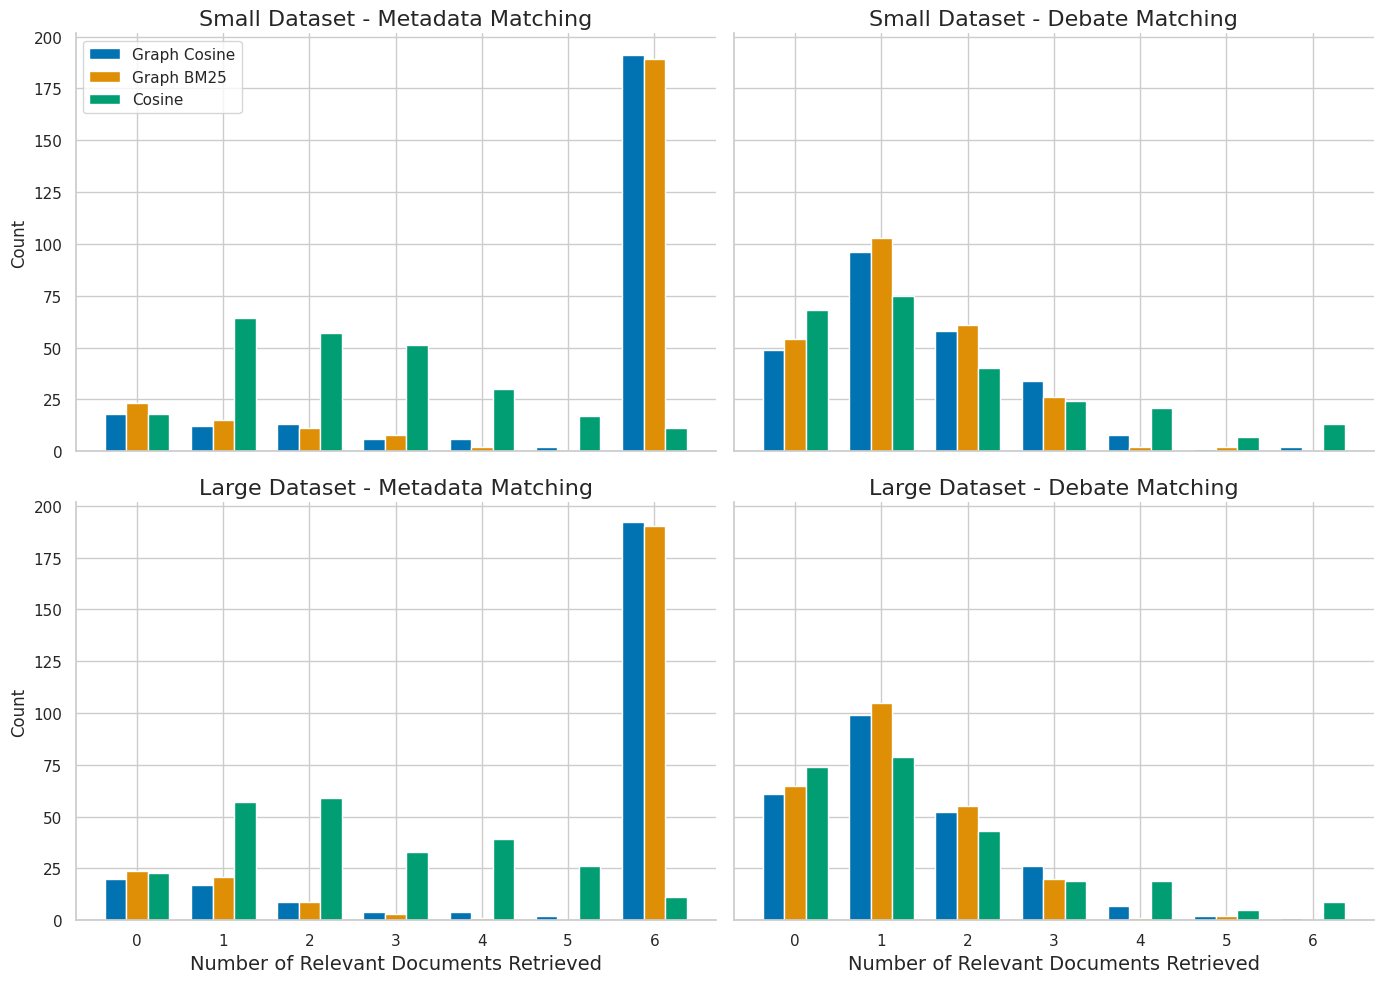

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Set seaborn style
sns.set(style='whitegrid')

# Define a nice colorblind-friendly palette
palette = sns.color_palette("colorblind", 3)
color_graph = palette[0]
color_bm25 = palette[1]
color_cosine = palette[2]

# Data
labels = ['0', '1', '2', '3', '4', '5', '6']

small_metadata_graph_cosine = [18, 12, 13, 6, 6, 2, 191]
small_metadata_graph_bm25 = [23, 15, 11, 8, 2, 0, 189]
small_metadata_cosine = [18, 64, 57, 51, 30, 17, 11]

small_debate_graph_cosine = [49, 96, 58, 34, 8, 1, 2]
small_debate_graph_bm25 = [54, 103, 61, 26, 2, 2, 0]
small_debate_cosine = [68, 75, 40, 24, 21, 7, 13]

large_metadata_graph_cosine = [20, 17, 9, 4, 4, 2, 192]
large_metadata_graph_bm25 = [24, 21, 9, 3, 1, 0, 190]
large_metadata_cosine = [23, 57, 59, 33, 39, 26, 11]

large_debate_graph_cosine = [61, 99, 52, 26, 7, 2, 1]
large_debate_graph_bm25 = [65, 105, 55, 20, 1, 2, 0]
large_debate_cosine = [74, 79, 43, 19, 19, 5, 9]


# Labels and bar positions
labels = ['0', '1', '2', '3', '4', '5', '6']
x = np.arange(len(labels))
width = 0.25

# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)

# ---- Top Row: SMALL DATASET ----
# Metadata Matching (small)
axs[0, 0].bar(x - width, small_metadata_graph_cosine, width, label='Graph Cosine', color=color_graph)
axs[0, 0].bar(x, small_metadata_graph_bm25, width, label='Graph BM25', color=color_bm25)
axs[0, 0].bar(x + width, small_metadata_cosine, width, label='Cosine', color=color_cosine)
axs[0, 0].set_title('Small Dataset - Metadata Matching', fontsize=16)
axs[0, 0].set_ylabel('Count')
axs[0, 0].legend()

# Debate Matching (small)
axs[0, 1].bar(x - width, small_debate_graph_cosine, width, label='Graph Cosine', color=color_graph)
axs[0, 1].bar(x, small_debate_graph_bm25, width, label='Graph BM25', color=color_bm25)
axs[0, 1].bar(x + width, small_debate_cosine, width, label='Cosine', color=color_cosine)
axs[0, 1].set_title('Small Dataset - Debate Matching', fontsize=16)

# ---- Bottom Row: LARGE DATASET ----
# Metadata Matching (large)
axs[1, 0].bar(x - width, large_metadata_graph_cosine, width, label='Graph Cosine', color=color_graph)
axs[1, 0].bar(x, large_metadata_graph_bm25, width, label='Graph BM25', color=color_bm25)
axs[1, 0].bar(x + width, large_metadata_cosine, width, label='Cosine', color=color_cosine)
axs[1, 0].set_title('Large Dataset - Metadata Matching', fontsize=16)
axs[1, 0].set_xlabel('Number of Relevant Documents Retrieved', fontsize=14)
axs[1, 0].set_ylabel('Count')

# Debate Matching (large)
axs[1, 1].bar(x - width, large_debate_graph_cosine, width, label='Graph Cosine', color=color_graph)
axs[1, 1].bar(x, large_debate_graph_bm25, width, label='Graph BM25', color=color_bm25)
axs[1, 1].bar(x + width, large_debate_cosine, width, label='Cosine', color=color_cosine)
axs[1, 1].set_title('Large Dataset - Debate Matching', fontsize=16)
axs[1, 1].set_xlabel('Number of Relevant Documents Retrieved', fontsize=14)

# Shared formatting
for ax in axs.flat:
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

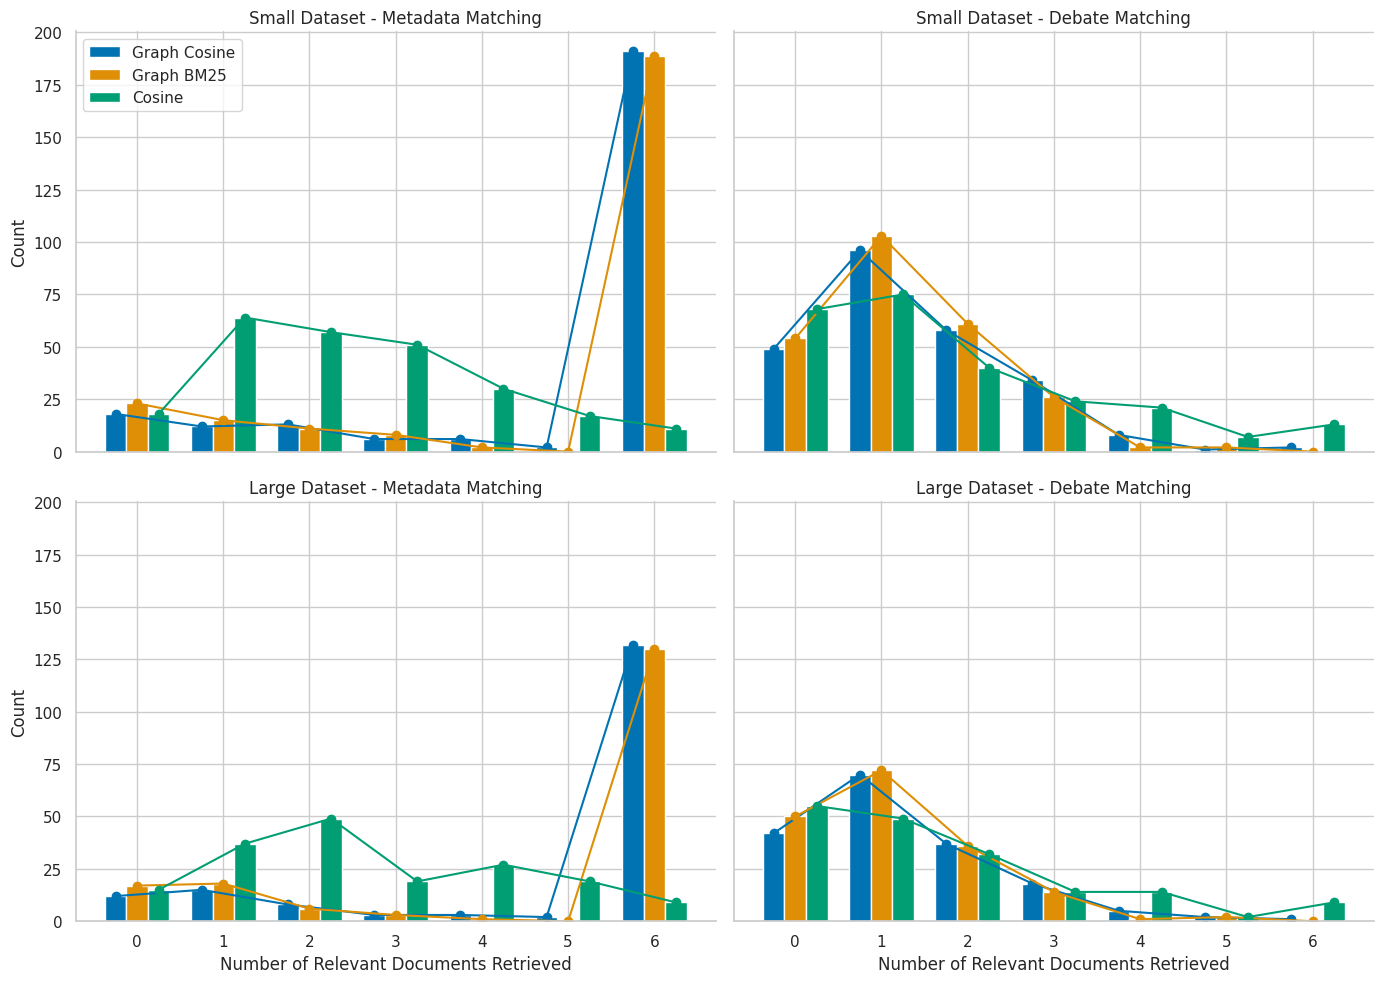

In [60]:

# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)

# Helper function to plot bars and lines
def plot_with_lines(ax, data1, data2, data3, title):
    ax.bar(x - width, data1, width, label='Graph Cosine', color=color_graph)
    ax.bar(x, data2, width, label='Graph BM25', color=color_bm25)
    ax.bar(x + width, data3, width, label='Cosine', color=color_cosine)
    
    # Overlay lines
    ax.plot(x - width, data1, color=color_graph, marker='o', linestyle='-', linewidth=1.5)
    ax.plot(x, data2, color=color_bm25, marker='o', linestyle='-', linewidth=1.5)
    ax.plot(x + width, data3, color=color_cosine, marker='o', linestyle='-', linewidth=1.5)
    
    ax.set_title(title)

# ---- Top Row: SMALL DATASET ----
plot_with_lines(axs[0, 0], small_metadata_graph_cosine, small_metadata_graph_bm25, small_metadata_cosine, 'Small Dataset - Metadata Matching')
axs[0, 0].set_ylabel('Count')
axs[0, 0].legend()

plot_with_lines(axs[0, 1], small_debate_graph_cosine, small_debate_graph_bm25, small_debate_cosine, 'Small Dataset - Debate Matching')

# ---- Bottom Row: LARGE DATASET ----
plot_with_lines(axs[1, 0], large_metadata_graph_cosine, large_metadata_graph_bm25, large_metadata_cosine, 'Large Dataset - Metadata Matching')
axs[1, 0].set_xlabel('Number of Relevant Documents Retrieved')
axs[1, 0].set_ylabel('Count')

plot_with_lines(axs[1, 1], large_debate_graph_cosine, large_debate_graph_bm25, large_debate_cosine, 'Large Dataset - Debate Matching')
axs[1, 1].set_xlabel('Number of Relevant Documents Retrieved')

# Shared formatting
for ax in axs.flat:
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

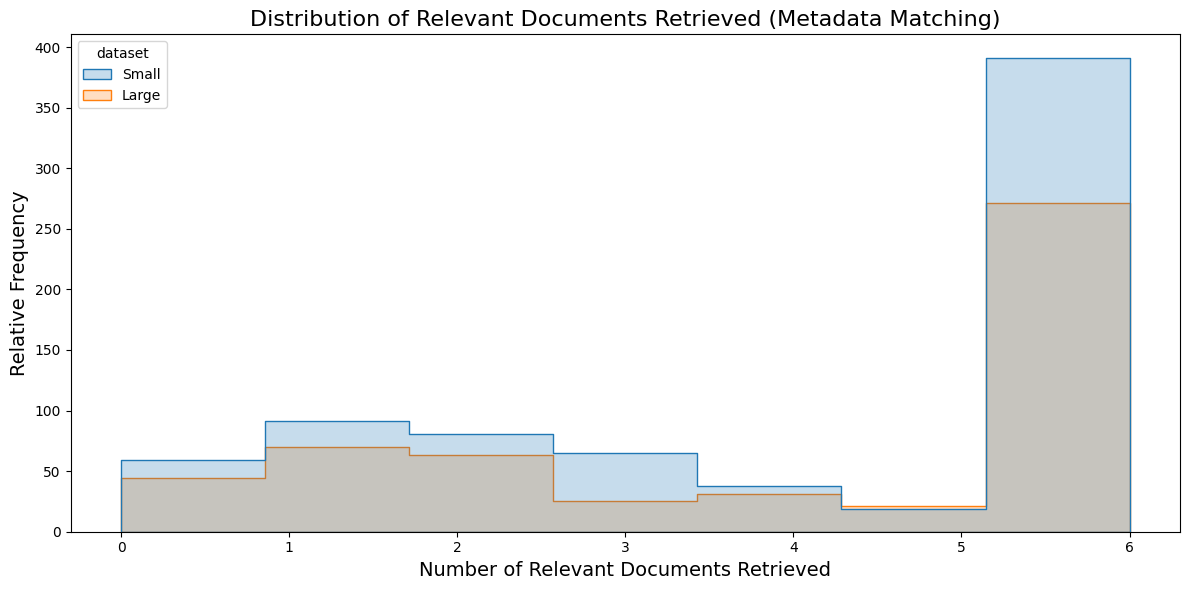

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create long-form dataframe from count list
def make_df(counts_list, model, dataset, match_type):
    return pd.DataFrame({
        'count': list(range(7)),
        'frequency': counts_list,
        'model': [model] * 7,
        'dataset': [dataset] * 7,
        'match_type': [match_type] * 7
    })

# Assemble all rows into a list
dfs = []

# Small - Metadata
dfs.append(make_df(small_metadata_graph_cosine, 'Graph Cosine', 'Small', 'Metadata'))
dfs.append(make_df(small_metadata_graph_bm25, 'Graph BM25', 'Small', 'Metadata'))
dfs.append(make_df(small_metadata_cosine, 'Cosine', 'Small', 'Metadata'))

# Large - Metadata
dfs.append(make_df(large_metadata_graph_cosine, 'Graph Cosine', 'Large', 'Metadata'))
dfs.append(make_df(large_metadata_graph_bm25, 'Graph BM25', 'Large', 'Metadata'))
dfs.append(make_df(large_metadata_cosine, 'Cosine', 'Large', 'Metadata'))

# Combine all into one DataFrame
df = pd.concat(dfs, ignore_index=True)

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x='count',
    hue='dataset',
    weights='frequency',
    bins=7,
    element='step',
    stat='count',
    multiple='layer',
    common_norm=False
)

plt.title('Distribution of Relevant Documents Retrieved (Metadata Matching)', fontsize=16)
plt.xlabel('Number of Relevant Documents Retrieved', fontsize=14)
plt.ylabel('Relative Frequency', fontsize=14)
plt.xticks(range(7))
plt.tight_layout()
plt.show()


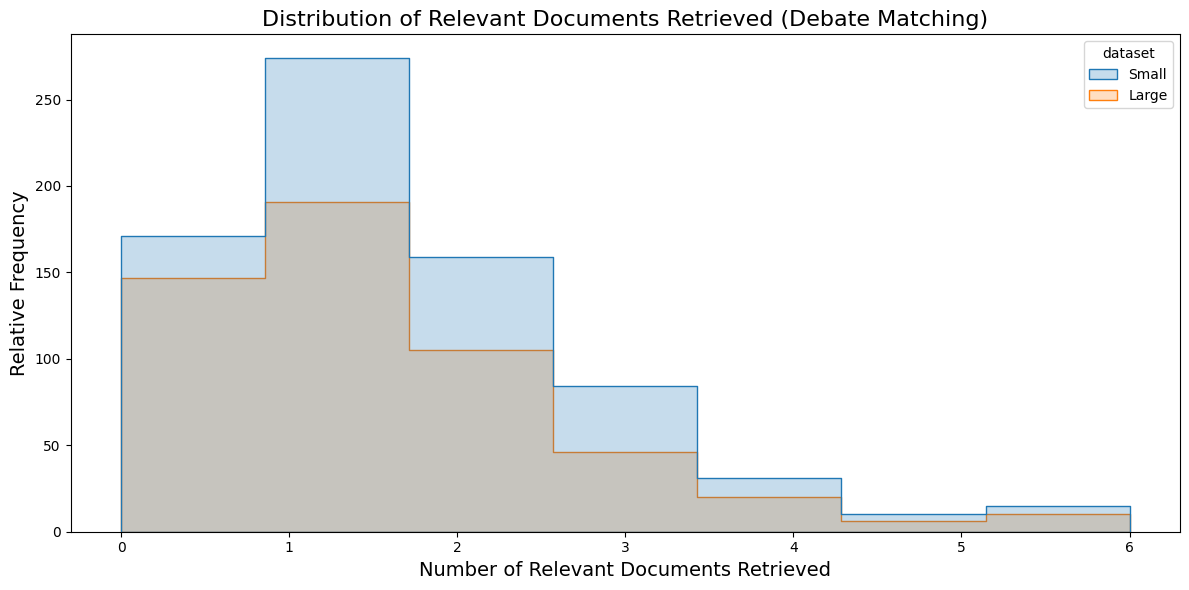

In [57]:
dfs = []

# Small Debate
dfs.append(make_df(small_debate_graph_cosine, 'Graph Cosine', 'Small', 'Debate'))
dfs.append(make_df(small_debate_graph_bm25, 'Graph BM25', 'Small', 'Debate'))
dfs.append(make_df(small_debate_cosine, 'Cosine','Small', 'Debate'))

# Large Debate
dfs.append(make_df(large_debate_graph_cosine, 'Graph Cosine', 'Large', 'Debate'))  # <-- fixed
dfs.append(make_df(large_debate_graph_bm25, 'Graph BM25', 'Large', 'Debate'))
dfs.append(make_df(large_debate_cosine, 'Cosine','Large', 'Debate'))

# Combine and plot
df = pd.concat(dfs, ignore_index=True)

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x='count',
    hue='dataset',
    weights='frequency',
    bins=7,
    element='step',
    stat='count',
    multiple='layer',
    common_norm=False
)

plt.title('Distribution of Relevant Documents Retrieved (Debate Matching)', fontsize=16)
plt.xlabel('Number of Relevant Documents Retrieved', fontsize=14)
plt.ylabel('Relative Frequency', fontsize=14)
plt.xticks(range(7))
plt.tight_layout()
plt.show()


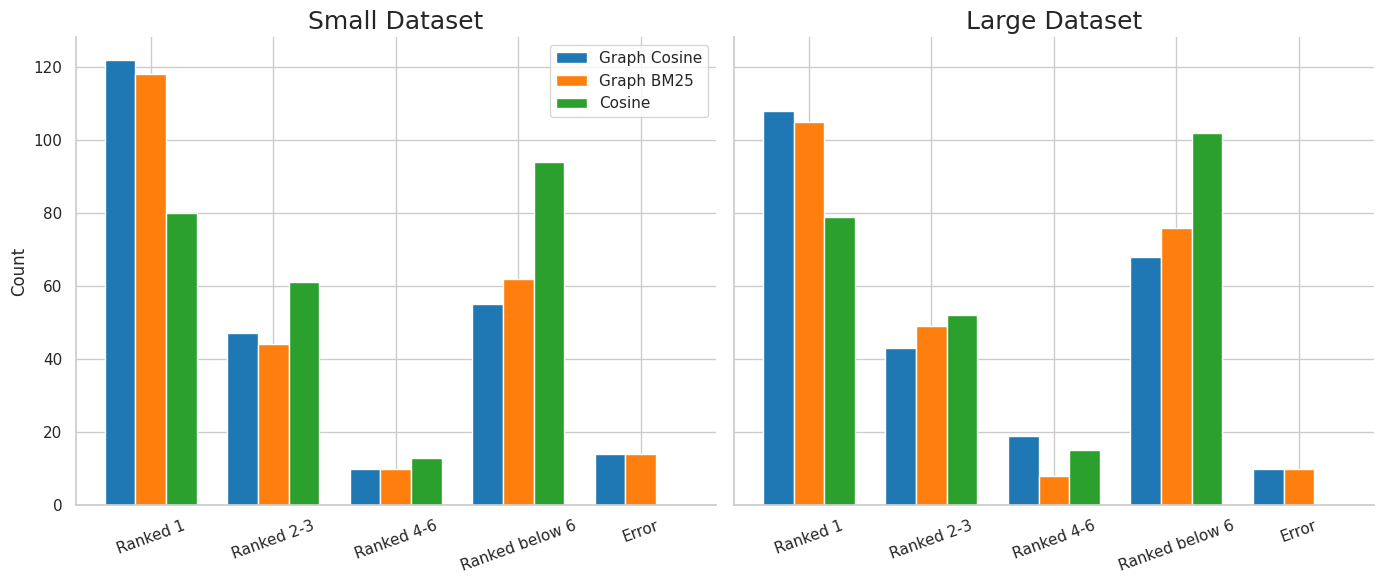

In [69]:
rank_labels = ['Ranked 1', 'Ranked 2-3', 'Ranked 4-6', 'Ranked below 6', 'Error']
x = np.arange(len(rank_labels))  # the label locations
width = 0.25  # width of the bars

# Small dataset values
small_graph_cosine = [122, 47, 10, 55, 14]
small_graph_bm25 = [118, 44, 10, 62, 14]
small_cosine = [80, 61, 13, 94, 0]

# Large dataset values
large_graph_cosine = [108, 43, 19, 68, 10]
large_graph_bm25 = [105, 49, 8, 76, 10]
large_cosine = [79, 52, 15, 102, 0]

# Colors (adjust to your preferred palette)
color_graph = "#1f77b4"  # muted blue
color_bm25 = "#ff7f0e"   # orange
color_cosine = "#2ca02c" # green

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- Small Dataset ---
axs[0].bar(x - width, small_graph_cosine, width, label='Graph Cosine', color=color_graph)
axs[0].bar(x, small_graph_bm25, width, label='Graph BM25', color=color_bm25)
axs[0].bar(x + width, small_cosine, width, label='Cosine', color=color_cosine)
axs[0].set_title('Small Dataset', fontsize=18)
axs[0].set_ylabel('Count')
axs[0].set_xticks(x)
axs[0].set_xticklabels(rank_labels, rotation=20)
axs[0].legend()

# --- Large Dataset ---
axs[1].bar(x - width, large_graph_cosine, width, label='Graph Cosine', color=color_graph)
axs[1].bar(x, large_graph_bm25, width, label='Graph BM25', color=color_bm25)
axs[1].bar(x + width, large_cosine, width, label='Cosine', color=color_cosine)
axs[1].set_title('Large Dataset', fontsize=18)
axs[1].set_xticks(x)
axs[1].set_xticklabels(rank_labels, rotation=20)

# Shared formatting
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
